# dhlab class demo

In [1]:
import dhlab as dh

## Corpus

In [2]:
dh.Corpus??

Init signature:
dh.Corpus(
    doctype=None,
    author=None,
    freetext=None,
    fulltext=None,
    from_year=None,
    to_year=None,
    from_timestamp=None,
    to_timestamp=None,
    title=None,
    ddk=None,
    subject=None,
    lang=None,
    limit=10,
    order_by='random',
)
Source:        
class Corpus(DhlabObj):
    """Class representing as DHLAB Corpus

    Primary object for working with dhlab data. Contains references to texts
    in National Library's collections and metadata about them.
    Use with `.coll`, `.conc` or `.freq` to analyse using dhlab tools.
    """
    def __init__(
            self,
            doctype=None,
            author=None,
            freetext=None,
            fulltext=None,
            from_year=None,
            to_year=None,
            from_timestamp=None,
            to_timestamp=None,
            title=None,
            ddk=None,
            subject=None,
            lang=None,
            limit=10,
            order_by="random"
    

```python
Init signature:
dh.Corpus(
    doctype=None,
    author=None,
    freetext=None,
    fulltext=None,
    from_year=None,
    to_year=None,
    from_timestamp=None,
    to_timestamp=None,
    title=None,
    ddk=None,
    subject=None,
    lang=None,
    limit=10,
    order_by='random',
)
```

In [3]:
korpus = dh.Corpus(doctype="digibok", title="Dracula")

In [4]:
korpus.frame.iloc[:5, [0,1,2,3,9]]

dhlabid                                  urn  \
0  100439375  URN:NBN:no-nb_digibok_2021042058016   
1  100346414  URN:NBN:no-nb_digibok_2017091805047   
2  100547952  URN:NBN:no-nb_digibok_2011071108102   
3  100138345  URN:NBN:no-nb_digibok_2013013008275   
4  100138409  URN:NBN:no-nb_digibok_2013013108024   

                                               title  \
0  Dracula : av Lars Saabye Christensen : fritt e...   
1                                            Dracula   
2                                            Dracula   
3                                      Dracula house   
4                                            Dracula   

                                             authors  year  
0                                                     2000  
1                   MacDonald , Eric / Stoker , Bram  1983  
2                    Stoker , Bram / Carling , Bjørn  2006  
3                                      Flikke , Nina  1986  
4  Stoker , Bram / Bringsværd , Tor Åge / Bing , ...  1974

## Conkordans

In [5]:
dh.Concordance??

Init signature: dh.Concordance(corpus=None, query=None, window=20, limit=500)
Source:        
class Concordance(DhlabObj):
    """Wrapper for concordance function"""

    def __init__(self, corpus=None, query=None, window=20, limit=500):
        """Get concordances for word(s) in corpus

        :param corpus: Target corpus, defaults to None
        :param query: word or list or words, defaults to None
        :param window: how many tokens to consider around the target word, \
            defaults to 20
        :param limit: limit returned hits, defaults to 500
        """

        self.concordance = concordance(
            urns=urnlist(corpus), words=query, window=window, limit=limit
        )
        self.concordance["link"] = self.concordance.urn.apply(make_link)
        self.concordance = self.concordance[["link", "urn", "conc"]]
        self.concordance.columns = ["link", "urn", "concordance"]
        self.corpus = corpus
        self.size = len(self.concordance)

        super(

```python
dh.Concordance(corpus=None, query=None, window=20, limit=500)
```

In [6]:
korpus.conc("Dracula").show()

## Frekvens

In [7]:
dh.Counts??

Init signature: dh.Counts(corpus=None, words=None)
Source:        
class Counts(DhlabObj):
    """Provide counts for a corpus - shouldn't be too large"""

    def __init__(self, corpus=None, words=None):
        """Get frequency list for Corpus

        :param corpus: target Corpus, defaults to None
        :param words: list of words to be counted, defaults to None
        """
        if corpus is None and words is None:
            self.counts = pd.DataFrame()
            self.title_dct = None
        elif corpus is not None:
            # count - if words is none result will be as if counting all words
            # in the corpus
            self.counts = get_document_frequencies(
                urns=urnlist(corpus), cutoff=0, words=words
            )
            
            # Include dhlab and title link in object
            self.title_dct = {k : v for k, v in zip(corpus.frame.dhlabid, corpus.frame.title)} 

        super().__init__(self.counts)

    def sum(self):
        """S

```python
dh.Counts(corpus=None, words=None)
```

In [8]:
korpus.count().display_names()

Dracula  Dracula : fritt etter Bram Stokers roman  \
.          646.0                                    3268.0   
,          500.0                                    1384.0   
og         288.0                                     524.0   
i          265.0                                     449.0   
^          154.0                                       0.0   
...          ...                                       ...   
forts.       0.0                                       0.0   
Nu           0.0                                       0.0   
Pause        0.0                                       0.0   
Ton          0.0                                       0.0   
onathan      0.0                                       0.0   

         Bram Stoker's Dracula  Dracula  Dracula house  Dracula  Dracula  \
.                        578.0   8495.0          287.0   8447.0   8162.0   
,                        368.0   9133.0          140.0   9659.0   9611.0   
og                       147.0   6206.0          151.0   6350.0   6312.0   
i                        250.0   2137.0          129.0   3092.0   2509.0   
^                        189.0      0.0            1.0      2.0      0.0   
...                        ...      ...            ...      ...      ...   
forts.                     0.0      0.0            0.0      0.0      0.0   
Nu                         0.0      0.0            0.0      0.0      0.0   
Pause                      0.0      0.0            0.0      0.0      0.0   
Ton                        0.0      0.0            0.0      0.0      0.0   
onathan                    0.0      0.0            0.0      0.0      0.0   

         Dracula  
.          832.0  
,          678.0  
og         261.0  
i          187.0  
^            1.0  
...          ...  
forts.      10.0  
Nu          13.0  
Pause       13.0  
Ton         17.0  
onathan     25.0  

[22202 rows x 8 columns]

### 

In [9]:
from dhlab import totals

In [10]:
tot = totals()

In [11]:
tot.freq

.               7655423257
,               5052171514
i               2531262027
og              2520268056
-               1314451583
                   ...    
tidspunkter         110667
dirigenter          110660
ondartet            110652
kulturtilbud        110652
trassig             110651
Name: freq, Length: 50000, dtype: int64

In [12]:
(korpus.coll("Dracula").frame.counts / tot.freq).sort_values(ascending=False).to_frame().head(10)

0
Dracula           0.000325
grev              0.000093
Jonathan          0.000044
Grev              0.000042
tyrkerne          0.000037
uverdige          0.000026
Depotbiblioteket  0.000025
vedlagte          0.000024
hungersnød        0.000024
Helsing           0.000020

## Ngram

In [13]:
??dh.Ngram

Init signature:
dh.Ngram(
    words=None,
    from_year=None,
    to_year=None,
    doctype='bok',
    mode='relative',
    lang='nob',
    **kwargs,
)
Source:        
class Ngram(DhlabObj):
    """Top level class for ngrams"""

    def __init__(self,
                 words=None,
                 from_year=None,
                 to_year=None,
                 doctype='bok',
                 mode='relative',
                 lang="nob",
                 **kwargs
                 ):
        """Ngram builder class.

        Build Ngrams from the National Librarys collections.
        Use with book corpus or newspaper corpus.
        Lang parameter is only supported for book (`bok`) corpus.
        Defaults to `None` if doctype is `avis`.

        :param words: words to examine, defaults to None
        :type words: str or list of str, optional
        :param from_year: lower period cutoff, defaults to None
        :type from_year: int, optional
        :param to_year: upper period cutoff,

```python
dh.Ngram(
    words=None,
    from_year=None,
    to_year=None,
    doctype='bok',
    mode='relative',
    lang='nob',
    **kwargs,
)
```

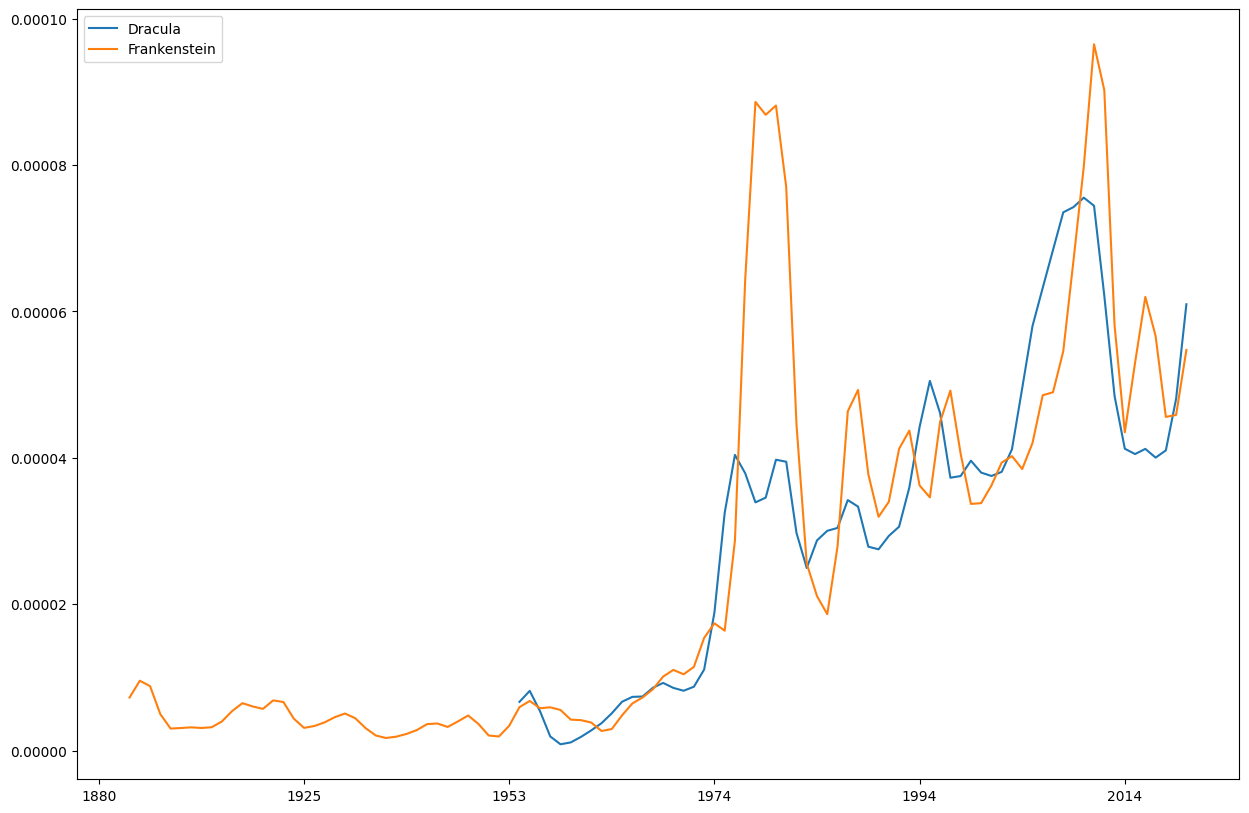

In [14]:
dh.Ngram(["Dracula", "Frankenstein"], from_year=1880, to_year=2020)